In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
count = 0
combined = pd.DataFrame()
for filename in os.listdir("/content/drive/My Drive/ML_PROJECT/Kitti Dataset/oxts/data/"):
   with open(os.path.join("/content/drive/My Drive/ML_PROJECT/Kitti Dataset/oxts/data/", filename), 'r') as f:
     df=pd.read_csv(f, sep=" ", names= ['Latitude', 'Longitude','alt','roll4','pitch5','yaw6','vn7','ve8','vf9','vl10',
                                         'vu11','ax12','ay13','ay14','af15','al16','au17','wx18','wy19','wz20','wf21','wl22',
                                         'wu23','pos_accuracy24','vel_accuracy25','navstat26','numsats27','posmode28','velmode29','orimode30'])
     combined = combined.append(df, ignore_index=True)
     count = count+1     
print(count)     

1168


In [ ]:
combined

,Latitude,Longitude,alt,roll4,pitch5,yaw6,vn7,ve8,vf9,vl10,...,wf21,wl22,wu23,pos_accuracy24,vel_accuracy25,navstat26,numsats27,posmode28,velmode29,orimode30
0,49.014926,8.434092,116.479019,0.029386,0.010244,-2.651448,-5.903558,-10.730321,12.246465,-0.129769,...,0.007345,-0.010770,-0.039380,0.027659,0.012728,4,11,6,6,6
1,49.014925,8.434090,116.479141,0.029493,0.010209,-2.651784,-5.893934,-10.723688,12.236022,-0.129124,...,0.007839,-0.009682,-0.038517,0.027659,0.012728,4,11,6,6,6
2,49.014939,8.434127,116.479263,0.027855,0.012709,-2.642057,-6.142090,-10.888501,12.500562,-0.147715,...,-0.004389,0.020902,-0.040179,0.027659,0.012728,4,10,6,6,6
3,49.014930,8.434102,116.479469,0.028793,0.010921,-2.648714,-5.969836,-10.780078,12.322058,-0.130633,...,0.006963,-0.014067,-0.039971,0.027659,0.012728,4,10,6,6,6
4,49.014925,8.434089,116.479324,0.029536,0.010124,-2.652166,-5.884659,-10.716595,12.225340,-0.128991,...,0.007316,-0.009507,-0.038473,0.027659,0.012728,4,11,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,49.014946,8.434148,116.471375,0.028165,0.009238,-2.636371,-6.272388,-10.958835,12.625937,-0.158608,...,-0.016457,0.025429,-0.036584,0.027659,0.012728,4,10,6,6,6
1164,49.014923,8.434083,116.479698,0.029344,0.010295,-2.653754,-5.850205,-10.687577,12.183294,-0.131581,...,0.001159,-0.002911,-0.038524,0.027659,0.012728,4,11,6,6,6
1165,49.014928,8.434096,116.479065,0.029266,0.010416,-2.650287,-5.931284,-10.751847,12.278706,-0.129507,...,0.009697,-0.013895,-0.039822,0.027659,0.012728,4,11,6,6,6
1166,49.014929,8.434100,116.479317,0.028854,0.011044,-2.649059,-5.960321,-10.773317,12.311536,-0.130268,...,0.006841,-0.010181,-0.039173,0.027659,0.012728,4,10,6,6,6


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.999)

In [ ]:
data = combined.values[:,0:2]
k5 = pca.fit_transform(data)

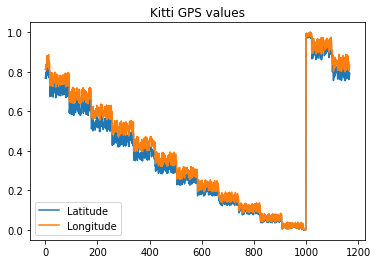

In [ ]:
sc1 = MinMaxScaler()

plt.title('Kitti GPS values')
plt.plot(sc1.fit_transform(combined['Latitude'].values.reshape(-1,1)), label = 'Latitude')
plt.plot(sc1.fit_transform(combined['Longitude'].values.reshape(-1,1)), label = 'Longitude')
plt.legend(loc= 'lower left')

In [ ]:
virtual =pd.read_csv('/content/drive/My Drive/ML_PROJECT/virtual.csv', sep=",", names= ['Latitude', 'Longitude'])

In [ ]:
virtual

,Latitude,Longitude
0,47.641468,-122.140165
1,47.641488,-122.140143
2,47.641497,-122.140108
3,47.641497,-122.140074
4,47.641485,-122.140039
...,...,...
697,47.640647,-122.142150
698,47.640593,-122.142208
699,47.640547,-122.142283
700,47.640511,-122.142371


In [ ]:
real_world_dataset = pd.read_csv('/content/drive/My Drive/ML_PROJECT/S-M.csv')

sc2 = MinMaxScaler()
lats = sc2.fit_transform(real_world_dataset.values[:,0].reshape(-1,1))
lat_new = []
for i in range(0,len(lats),100):
    lat_new.append(lats[i])


sc3 = MinMaxScaler()
long = sc3.fit_transform(real_world_dataset.values[:,1].reshape(-1,1))
long_new = []
for i in range(0,len(long),100):
    long_new.append(long[i])

1060

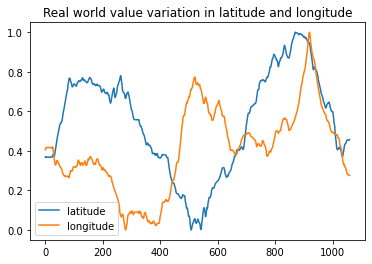

In [ ]:
plt.plot(lat_new, label = 'latitude')
plt.plot(long_new, label = 'longitude')
plt.legend(loc="lower left")
plt.title("Real world value variation in latitude and longitude")
len(lat_new)

In [ ]:
sc2 = MinMaxScaler()
#lats_sim = sc2.fit_transform(virtual_data_array[:,0].reshape(-1,1))
lats_sim = virtual.values[:,0].reshape(-1,1)
lats_sim_arr = []
for i in range(0,len(lats_sim),2):
    lats_sim_arr.append(lats_sim[i])
lats_sim_arr = sc2.fit_transform(lats_sim_arr)

sc3 = MinMaxScaler()
#long_sim = sc3.fit_transform(virtual.values[:,1].reshape(-1,1))
long_sim = virtual.values[:,1].reshape(-1,1)
long_sim_arr = []
for i in range(0,len(long_sim),2):
    long_sim_arr.append(long_sim[i])

long_sim_arr = sc3.fit_transform(long_sim_arr)

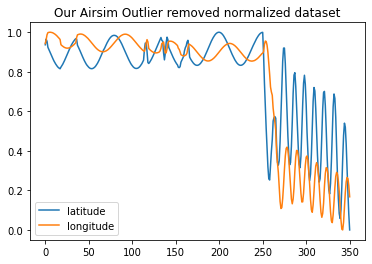

In [ ]:
plt.title("Our Airsim Outlier removed normalized dataset")
plt.plot(lats_sim_arr, label = 'latitude')
plt.plot(long_sim_arr, label = 'longitude')
plt.legend(loc = 'lower left')

In [ ]:
total_length = 300
lat_new = lat_new[0:total_length]
long_new = long_new[0:total_length]
real_world = np.hstack((lat_new,long_new))

lats_sim_arr_new  = lats_sim_arr[0:total_length]
long_sim_arr_new  = long_sim_arr[0:total_length]
sim_world = np.hstack((lats_sim_arr_new,long_sim_arr_new))

Text(0.5, 1.0, 'Comparison of GPS values')

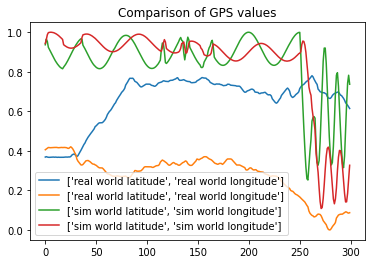

In [ ]:
plt.plot(real_world, label = ["real world latitude","real world longitude"])
plt.plot(sim_world, label = ["sim world latitude","sim world longitude"])
plt.legend(loc = "lower left")
plt.title('Comparison of GPS values')

In [ ]:
inputs = []
outputs = []

In [ ]:
import math

look_back = 10
x = sim_world

for i in range (len(x)-1):
    start = 0
    for j in range (len(x) - look_back):
        stop = start + look_back
        
        input = x[start:stop]
        #output = y[i][mid_value+start]
        output = 1
        start += 1
        inputs.append(input)
        outputs.append(output)
    
        #print('input', input)
        #print('output', output)
        #print('start', start)
        #print(y[0][0:5])
        

In [ ]:
inputs = np.array(inputs)
outputs= np.array(outputs)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( inputs, outputs, test_size=0.5, shuffle= True, random_state=42)

In [ ]:
# helps in model building
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, sparse_categorical_crossentropy, categorical_crossentropy
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import pandas as pd

In [ ]:

model1 = Sequential()
model1.add(InputLayer((10, 2)))
model1.add(GRU(100, activation = 'tanh', return_sequences = True))
model1.add(GRU(80, activation = 'tanh',  dropout = 0.9))
model1.add(tf.keras.layers.Dropout(0.8))
model1.add(Dense(80, activation  = 'relu'))
model1.add(tf.keras.layers.Dropout(0.8))
model1.add(Dense(4, activation = 'Softmax'))
#model1.add(Dense(39, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 100)           31200     
                                                                 
 gru_1 (GRU)                 (None, 80)                43680     
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 80)                6480      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 324       
                                                                 
Total params: 81,684
Trainable params: 81,684
Non-traina

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',f1_m,precision_m, recall_m])

history = model1.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 1024,epochs=3)

Epoch 1/3
43/43 [==============================] - 18s 319ms/step - loss: 0.9423 - accuracy: 0.8385 - val_loss: 0.7437 - val_accuracy: 1.0000
Epoch 2/3
43/43 [==============================] - 13s 305ms/step - loss: 0.7487 - accuracy: 0.9974 - val_loss: 0.7437 - val_accuracy: 1.0000
Epoch 3/3
43/43 [==============================] - 12s 290ms/step - loss: 0.7462 - accuracy: 0.9988 - val_loss: 0.7437 - val_accuracy: 1.0000


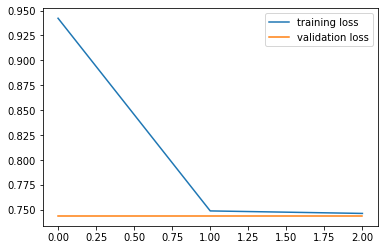

In [ ]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

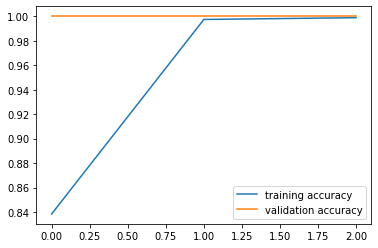

In [ ]:
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(generator2)
print("Accuracy: %.2f%%" % (scores[1]*100))

NameError: ignored